In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#dep info later
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [3]:
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("cleandata.csv")
columns = list(df)
df['Position'] = pd.Categorical(df['Position'],
                                    categories=['Professor', 'Associate Professor', 'Assistant Professor', 'Lecturer',
                                                'Lab Lecturer'],
                                    ordered=True)
df["age_by_5"] = ((df["age"] -1)// 4) * 4+1
df["C"] = pd.to_numeric(df["C"], errors="coerce")
df["P"] = pd.to_numeric(df["P"], errors="coerce")
df["H"] = pd.to_numeric(df["H"], errors="coerce")
df["P5"] = pd.to_numeric(df["P5"], errors="coerce")
df["C5"] = pd.to_numeric(df["C5"], errors="coerce")
df["H5"] = pd.to_numeric(df["H5"], errors="coerce")
df["avgC"] = pd.to_numeric(df["avgC"], errors="coerce")
df["P5avg"] = df["P5"] /6
df["C5avg"] = df["C5"] /6
df["H5avg"] = df["H5"] /6
list_of_positions = ['Professor', 'Associate Professor', 'Assistant Professor', 'Lecturer', 'Lab Lecturer']
list_of_dept = df["Dept"].value_counts().index
df[["P","C","H","P5","C5","H5"]] = df[["P","C","H","P5","C5","H5"]].fillna(0)
# dep_categorization_by_region()

colors=["b","g","r","c","m","y","k","w"]


In [5]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(df[["P","C","age"]]),
                   columns=["P","C","age"])



C:\Users\chick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


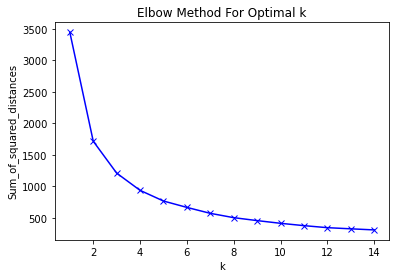

In [6]:


Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.savefig("elbowgraph.png")
plt.show()   



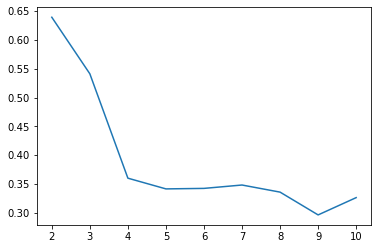

In [7]:
from sklearn.metrics import silhouette_score


sil_score = []
for i in range(2, 11): 
    pipe=Pipeline([("kmeans",KMeans(n_clusters=i))])
    pipe.fit(X)
    pred=pipe.predict(X)
    sil_score.append(silhouette_score(X,pred))


plt.plot([i for i in range(2,11)],
         sil_score)
plt.show()

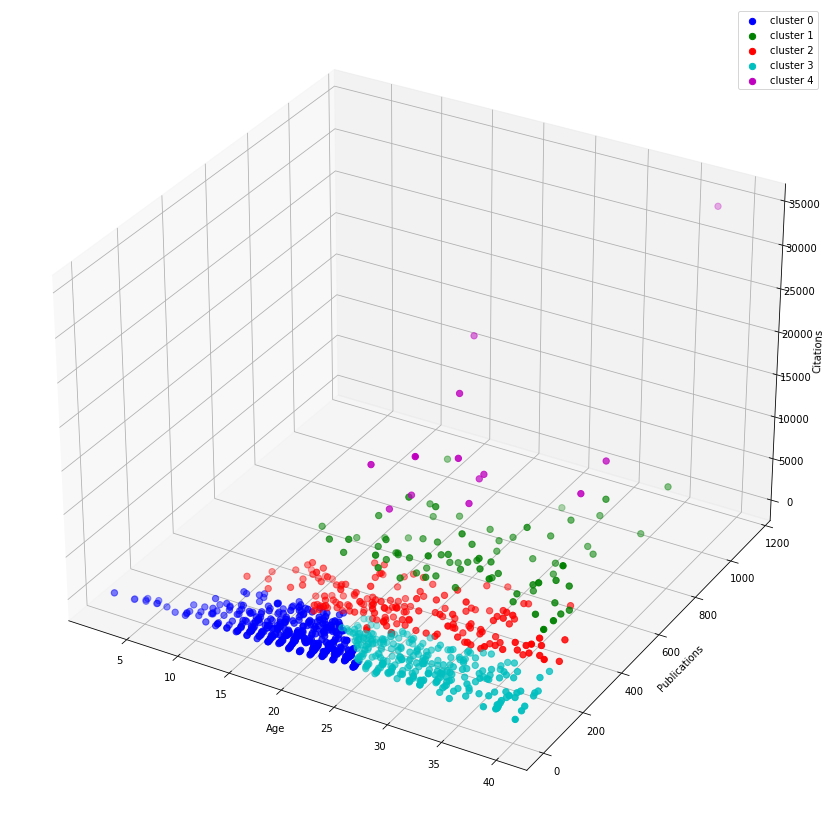

In [8]:

n_clusters=5
kmeans = KMeans(n_clusters, random_state=0).fit(X)
pred= kmeans.predict(X)



df["cluster"]=pred

# kmeans.cluster_centers_
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')   
for i in range(n_clusters):

# & (df["C"]<12000) & (df["P"]<1500) 

    filt =  (df["cluster"]==i)
    temp_df = df[filt]
    ax.scatter(temp_df["age"],temp_df["P"],temp_df["C"], s = 40 , color =colors[i], label = f"cluster {i}")
ax.set_xlabel('Age')
ax.set_ylabel('Publications')
ax.set_zlabel('Citations')
ax.legend()
# print(kmeans.score(X))
plt.savefig("clustering3d.png")
plt.show()

In [9]:
print(df.groupby("cluster").describe()["P"])
print(df.groupby("cluster").describe()["C"])
print(df.groupby("cluster").describe()["age"])

         count        mean         std    min     25%    50%    75%     max
cluster                                                                    
0        366.0   51.672131   35.366444    1.0   23.00   46.0   73.0   165.0
1         78.0  343.910256  144.921670  120.0  257.25  314.0  436.0   793.0
2        175.0  191.520000   61.692307   71.0  155.50  185.0  226.0   405.0
3        274.0   80.609489   41.448464    8.0   45.00   78.5  110.0   189.0
4         13.0  382.000000  264.728477  152.0  242.00  333.0  382.0  1145.0
         count          mean          std      min       25%      50%  \
cluster                                                                 
0        366.0    635.062842   577.317732      0.0    183.00    487.5   
1         78.0   7746.025641  2155.729376   4282.0   5834.25   7515.5   
2        175.0   3363.502857  1200.602066    989.0   2425.50   3198.0   
3        274.0    935.850365   648.292683     10.0    367.00    820.0   
4         13.0  20118.384615  